# Classification Modeling

In [1]:
import classifiers as clf

import pickle

import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler

from imblearn.over_sampling  import SMOTE
from imblearn.over_sampling  import SMOTENC

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Load Species Data

In [2]:
species = pd.read_pickle("../Data/species.pkl")
species.head()

,Scientific Name,Common Name,Group,Federal Listing Status,VIP,State,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
0,Accipiter gentilis,Northern goshawk,Birds,Not Listed,V,AL,32413,22877
1,Acipenser fulvescens,Lake sturgeon,Fishes,Not Listed,V,AL,32413,22877
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,Threatened,V,AL,32413,22877
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,Not Listed,I,AL,32413,22877
4,Agrimonia incisa,Incised groovebur,Flowering Plants,Not Listed,P,AL,32413,22877


### Set Target and Feature Variables

In [3]:
# Create target variables
y = species['Federal Listing Status']
y_labels = list(y.unique())
print(y_labels)

# Create target variables
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name', 'VIP', 'State', 'Group'], axis = 1)
X.head()

['Not Listed', 'Threatened', 'Endangered']


,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
0,32413,22877
1,32413,22877
2,32413,22877
3,32413,22877
4,32413,22877


### Create Training and Test Sets

In [4]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# data set statistics
data_sets = pd.DataFrame({'Train':        y_train.value_counts(),
                          'Test':         y_test.value_counts(),
                          'Train Normal': y_train.value_counts() / y_train.count(),
                          'Test Normal':  y_test.value_counts()  / y_test.count()})

data_sets.loc['Total'] = data_sets.sum().astype(int)
data_sets

,Train,Test,Train Normal,Test Normal
Not Listed,6907,1768,0.760934,0.778855
Endangered,1529,355,0.168448,0.156388
Threatened,641,147,0.070618,0.064758
Total,9077,2270,1.000000,1.000000


### Feature Scaling

In [ ]:
X_train.head()

In [5]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
8328,0.118478,0.095963
8098,0.083443,0.142299
5830,0.061013,0.035013
10617,0.067439,0.121392
8418,0.166514,0.229762


### Classification Model Hyper Parameter Grid Search

In [6]:
# define parameter grid search for all classifiers
classifiers = []

# dummy classifier
classifiers.append(
    clf.grid_search_dummy_classifier(dict(
        strategy=['most_frequent','stratified'])))

# logistic regression
classifiers.append(
    clf.grid_search_logistic_regression(dict(
        C=[1e-2,1e0,1e2,1e6,1e12],
        penalty=['l1', 'l2'],
        fit_intercept=[True, False],
        multi_class=['ovr'],
        solver=['liblinear'])))

# multinomial naive bayes classifer

# k nearest neighbors classifier
classifiers.append(
    clf.grid_search_k_neighbors_classifier(dict(
#        n_neighbors=[5,11],
#        weights=['uniform', 'distance'],
        algorithm=['ball_tree','kd_tree'],
        leaf_size=[100,200])))

# decision tree classifier
classifiers.append(
    clf.grid_search_decision_tree_classifier(dict(
        criterion=['gini','entropy'],
#        max_depth=[6,8],
#        min_samples_leaf=[20,50,100],
#        max_features=[20,30,40],
        min_impurity_decrease=[0.01,0.03,0.05])))

# random forest classifier
classifiers.append(
    clf.grid_search_random_forest_classifier(dict(
        n_estimators=[100,200,300],
#        max_depth=[2,3,4],
#        min_samples_leaf=[100,200],
#        max_features=[10,20],
        min_impurity_decrease=[0.01,0.03,0.05])))

# ada boost classifer
classifiers.append(
    clf.grid_search_ada_boost_classifier(dict(
        n_estimators=[100,200,300],
        learning_rate=[0.5,1.0])))

### Baseline Classification Models

In [7]:
# run baseline dataset
baseline = clf.fit_predict_measure(
    'Baseline', X_train, scaler.transform(X_test), y_train, y_test, y_labels, classifiers)
baseline

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1610s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0673s.) Setting batch_size=4.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    9.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.3s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   32.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.6s finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Baseline,Dummy,{'strategy': 'most_frequent'},Train,0.760934,0.579021,0.760934,0.657629,NaN
1,Baseline,Dummy,{'strategy': 'stratified'},Train,0.611325,0.611155,0.617274,0.608609,NaN
2,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
3,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.760934,0.579021,0.760934,0.657629,NaN
4,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.760934,0.579021,0.760934,0.657629,NaN
5,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.755536,0.596593,0.755536,0.656300,NaN
6,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.760934,0.579021,0.760934,0.657629,NaN
7,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.760934,0.579021,0.760934,0.657629,NaN
8,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.760934,0.579021,0.760934,0.657629,NaN
9,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.760934,0.579021,0.760934,0.657629,NaN


In [8]:
# statistics of baseline classifiers (test and training sets)
baseline.describe()

,Accuracy,Precision,Recall,F1 Score
count,53.000000,53.000000,53.000000,53.000000
mean,0.756663,0.587526,0.756775,0.659913
std,0.023901,0.017110,0.023209,0.010680
min,0.611325,0.579021,0.617274,0.608609
25%,0.760934,0.579021,0.760934,0.657629
50%,0.760934,0.579021,0.760934,0.657629
75%,0.760934,0.579021,0.760934,0.657629
max,0.778855,0.638906,0.778855,0.683705


In [9]:
# best estimators of baseline dataset
baseline_test = baseline[baseline['Split'] == 'Test']
baseline_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
28,Baseline,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 100}",Test,0.751982,0.638906,0.751982,0.683705,"[[1685, 0, 83], [137, 0, 10], [333, 0, 22]]"
2,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
23,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
35,Baseline,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
45,Baseline,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"
52,Baseline,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 100}",Test,0.778855,0.606615,0.778855,0.682028,"[[1768, 0, 0], [147, 0, 0], [355, 0, 0]]"


### Handling Class Imbalance with SMOTENC Oversampling

In [10]:
# balance classes with SMOTE oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

# balanced data set statistics
smote_sets = pd.DataFrame({'Train':        y_train_smote.value_counts(),
                           'Test':         y_test.value_counts(),
                           'Train Normal': y_train_smote.value_counts() / y_train_smote.count(),
                           'Test Normal':  y_test.value_counts()  / y_test.count()})

smote_sets.loc['Total'] = smote_sets.sum().astype(int)
smote_sets

,Train,Test,Train Normal,Test Normal
Endangered,6907,355,0.333333,0.156388
Not Listed,6907,1768,0.333333,0.778855
Threatened,6907,147,0.333333,0.064758
Total,20721,2270,1.000000,1.000000


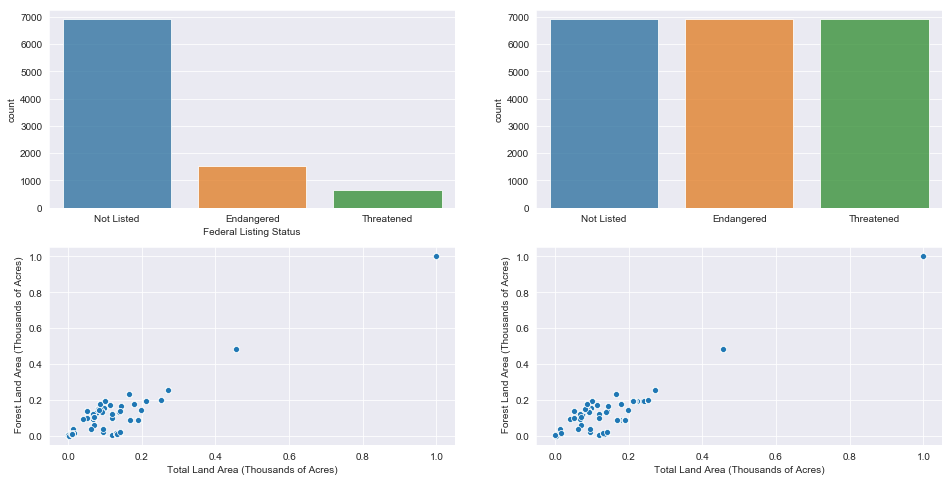

In [11]:
# plot comparison of unbalanced and balanced training sets
fig, axes = plt.subplots(2, 2, figsize=(16,8))

sns.countplot(y_train,       order=y_train.value_counts().index, alpha=0.8, ax = axes[0,0])
sns.countplot(y_train_smote, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,1])

sns.scatterplot(x=X_train.columns[0],       y=X_train.columns[1],       data=X_train,       ax = axes[1,0])
sns.scatterplot(x=X_train_smote.columns[0], y=X_train_smote.columns[1], data=X_train_smote, ax = axes[1,1])

### Balanced Classification Models

In [12]:
# run balanced dataset
balanced = clf.fit_predict_measure(
    'Balanced', X_train_smote, scaler.transform(X_test), y_train_smote, y_test, y_labels, classifiers)
balanced

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1558s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1247s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   20.8s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   22.3s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.2min remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Balanced,Dummy,{'strategy': 'most_frequent'},Train,0.333333,0.111111,0.333333,0.166667,NaN
1,Balanced,Dummy,{'strategy': 'stratified'},Train,0.331982,0.329719,0.329231,0.329929,NaN
2,Balanced,Dummy,{'strategy': 'stratified'},Test,0.319824,0.615029,0.319824,0.391929,"[[579, 591, 598], [54, 40, 53], [132, 116, 107]]"
3,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.365619,0.239855,0.365619,0.284064,NaN
4,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.406592,0.429169,0.406592,0.353342,NaN
5,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.332272,0.131970,0.332272,0.167187,NaN
6,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.334540,0.286738,0.334540,0.170250,NaN
7,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.404662,0.405761,0.404662,0.382700,NaN
8,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.405289,0.406382,0.405289,0.383129,NaN
9,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.373968,0.250806,0.373968,0.299072,NaN


In [13]:
# statistics of balanced classifiers (test and training sets)
balanced.describe()

,Accuracy,Precision,Recall,F1 Score
count,53.000000,53.000000,53.000000,53.000000
mean,0.379557,0.337525,0.379505,0.321331
std,0.057740,0.166961,0.057784,0.108157
min,0.099119,0.043082,0.099119,0.047221
25%,0.334361,0.243966,0.334361,0.290305
50%,0.388109,0.330323,0.388109,0.306217
75%,0.408281,0.406382,0.408281,0.387230
max,0.467014,0.711594,0.467014,0.498534


In [14]:
# best estimators of balanced dataset
balanced_test = balanced[balanced['Split'] == 'Test']
balanced_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
35,Balanced,Decision Tree,"{'criterion': 'entropy', 'min_impurity_decreas...",Test,0.421145,0.711594,0.421145,0.498534,"[[769, 777, 222], [40, 105, 2], [94, 179, 82]]"
52,Balanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Test,0.411013,0.708922,0.411013,0.484405,"[[716, 644, 408], [41, 81, 25], [81, 138, 136]]"
23,Balanced,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.402203,0.689159,0.402203,0.459020,"[[667, 286, 815], [34, 30, 83], [94, 45, 216]]"
28,Balanced,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200}",Test,0.334361,0.666442,0.334361,0.399962,"[[549, 648, 571], [50, 57, 40], [79, 123, 153]]"
2,Balanced,Dummy,{'strategy': 'stratified'},Test,0.319824,0.615029,0.319824,0.391929,"[[579, 591, 598], [54, 40, 53], [132, 116, 107]]"
45,Balanced,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.099119,0.043082,0.099119,0.047221,"[[0, 1508, 260], [0, 137, 10], [0, 267, 88]]"


### Data Loading

In [15]:
baseline.to_pickle('../Data/baseline.pkl')
balanced.to_pickle('../Data/balanced.pkl')
pd.DataFrame(y_labels).to_pickle('../Data/y_labels.pkl')